In [1]:
import numpy as np
import pandas as pd
import math 
import regex as re
from datetime import datetime
import timedelta as td
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def dirImagens(pDirImagem):
    try:
        if (not os.path.isdir(pDirImagem)):
            os.mkdir(pDirImagem)
    except OSError as e:
        print(e.args[1])
    
def abriPlanilha():
    diretorio='./data/'
    for arquivo in os.listdir(diretorio):
        if ((re.findall('GRUPOS', arquivo)) and          
            (re.findall('csv', arquivo))
           ):
            return (diretorio+arquivo)
    
dirImagens('Imagens2')
    
ins = pd.read_csv(abriPlanilha()
                 ,header=1
                 ,sep=','
                 ,low_memory=True
                 )

In [3]:
colunas=['situacao','nroInscricao','nome',
        'cpf','dataNascimento','genero','escolaridade',
        'instituicao','telefone','email','cep','bairro',
        'cidade','grupo','perfil','camiseta']

ins.columns=colunas

In [4]:
def columnsDrop():
    ins.drop(['situacao','nroInscricao','cpf','telefone','email','cep','bairro'], axis=1, inplace=True)
    ins.dropna(axis=0, subset=['dataNascimento','genero','escolaridade','cidade','grupo','perfil'], inplace=True)
    
columnsDrop()
ins.head(5)

,nome,dataNascimento,genero,escolaridade,instituicao,cidade,grupo,perfil,camiseta
0,Andrey Oliveira Pinto,03/03/2005,Masculino,Ensino Médio completo,Etec Abdias do Nascimento,São Paulo,GRUPO 01,estudante,Tamanho de Camiseta: GG
1,Giovanna Carvalho de Moraes,16/04/2006,Feminino,Ensino Médio completo,Etec Abdias do nascimento,São Paulo,GRUPO 01,estudante,Tamanho de Camiseta 2: G
2,Sthefany dos Santo Soares,30/05/2004,Feminino,Ensino Médio completo,Etec Abdias do nascimento,São Paulo,GRUPO 01,estudante,Tamanho de Camiseta 3: G
3,Laura Carvalho de Moraes,28/04/2008,Feminino,Ensino Médio incompleto,Etec Abdias do Nascimento,São Paulo,GRUPO 01,estudante,Tamanho de Camiseta 3: G
5,Nicoli Mian Ventura de Paula,27/10/2006,Feminino,Ensino médio,Eniac,Arujá,GRUPO 11,Universitário,Tamanho de Camiseta: M


In [5]:
def columnsInsert():
    ins.insert(2, 'dataNascAjustada', ' ')
    ins.insert(3, 'idade', 0)
    ins.insert(5, 'generoId', 99)
    ins.insert(7, 'escolaridadeId', 0)
    ins.insert(8, 'escolaridade2', ' ')
    ins.insert(10, 'instituicaoId', 0)
    ins.insert(11, 'instituicaoAjustada', '')
    ins.insert(13, 'cidadeId', 0)
    ins.insert(17, 'tamanhoCamisetaId', 0)
    
columnsInsert()

In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 75
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nome                 62 non-null     object
 1   dataNascimento       62 non-null     object
 2   dataNascAjustada     62 non-null     object
 3   idade                62 non-null     int64 
 4   genero               62 non-null     object
 5   generoId             62 non-null     int64 
 6   escolaridade         62 non-null     object
 7   escolaridadeId       62 non-null     int64 
 8   escolaridade2        62 non-null     object
 9   instituicao          57 non-null     object
 10  instituicaoId        62 non-null     int64 
 11  instituicaoAjustada  62 non-null     object
 12  cidade               62 non-null     object
 13  cidadeId             62 non-null     int64 
 14  grupo                62 non-null     object
 15  perfil               62 non-null     object
 16  camiseta       

### Tabela output.

In [7]:
ins

,nome,dataNascimento,dataNascAjustada,idade,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,cidade,cidadeId,grupo,perfil,camiseta,tamanhoCamisetaId
0,Andrey Oliveira Pinto,03/03/2005,,0,Masculino,99,Ensino Médio completo,0,,Etec Abdias do Nascimento,0,,São Paulo,0,GRUPO 01,estudante,Tamanho de Camiseta: GG,0
1,Giovanna Carvalho de Moraes,16/04/2006,,0,Feminino,99,Ensino Médio completo,0,,Etec Abdias do nascimento,0,,São Paulo,0,GRUPO 01,estudante,Tamanho de Camiseta 2: G,0
2,Sthefany dos Santo Soares,30/05/2004,,0,Feminino,99,Ensino Médio completo,0,,Etec Abdias do nascimento,0,,São Paulo,0,GRUPO 01,estudante,Tamanho de Camiseta 3: G,0
3,Laura Carvalho de Moraes,28/04/2008,,0,Feminino,99,Ensino Médio incompleto,0,,Etec Abdias do Nascimento,0,,São Paulo,0,GRUPO 01,estudante,Tamanho de Camiseta 3: G,0
5,Nicoli Mian Ventura de Paula,27/10/2006,,0,Feminino,99,Ensino médio,0,,Eniac,0,,Arujá,0,GRUPO 11,Universitário,Tamanho de Camiseta: M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Sabrina Lopes Soares,21/09/2003,,0,Feminino,99,Ensino Superior,0,,Instituto Federal de São Paulo - Câmpus Guarulhos,0,,Guarulhos,0,GRUPO 09,Analista de Sistema,Tamanho de Camiseta: M,0
72,Jhordan dos Santos Alves,01/09/1999,,0,Masculino,99,Ensino Médio,0,,E.E. Prof. Frederico de Barros Brotero,0,,Guarulhos,0,GRUPO 09,Analista de Sistema,Tamanho de Camiseta: GG,0
73,Erick Daniel Santiago de Araujo,11/02/2003,,0,Masculino,99,Técnico Concluido - Desenvolvimento de Software,0,,Etec Guarulhos,0,,Guarulhos,0,N,Desenvolvedor,Tamanho de Camiseta: M,0
74,Esther Felipe dos Santos Farias,27/02/2003,,0,Feminino,99,6º Período - Engenharia Civil,0,,Centro Universitário Eniac,0,,Guarulhos,0,N,Universitário,Tamanho de Camiseta: P,0


### Biblioteca de funções.

In [8]:
def dataNascAjustada(pDataNascimento : str, éIdade : bool = False):
    if (pd.isnull(pDataNascimento)):
        if (éIdade):
            return 0
        else:
            return "Não informada!"
    
    dtNasc=pDataNascimento; dtRef=''
    #   
    pattern='([0-9]{1,2})([/])([0-9]{1,2})([/])([0-9]{2,4})'
        
    if (not re.search(pattern, dtNasc)):
        if (len(dtNasc)==6 or len(dtNasc)==8):
            pattern='([0-9]{2})([0-9]{2})([0-9]{2,4})'
            dtNasc=re.search(pattern, dtNasc)
            if (dtNasc):
                dtNasc='{}/{}/{}'.format(dtNasc.group(1),
                                        dtNasc.group(2),
                                        dtNasc.group(3)
                                        )
            else:
                return 0
            
        else:
            return 0
        
    dtNasc=datetime.strptime(dtNasc, '%d/%m/%Y')
                
    if (éIdade):
        diferencaData=(datetime.today()-dtNasc)
        dias=diferencaData.days
        anos, dias = divmod(dias, 365)
        dtRef=anos
    else:
        dtRef=dtNasc.strftime('%d/%m/%Y %H:%M:%S')
    
    return dtRef

def quantGenero(genero) -> int:
    if (pd.isnull(genero)):
        return 0
    else:
        genero=genero.upper(); genero=str.strip(genero)
    if (genero=='FEMININO'):
        return 1
    elif (genero=='MASCULINO'):
        return 2
    elif (re.search('N[AÃ]O BIN[AÁ]RIO', genero)):
        return 3
    elif (re.search('PREFIRO N[AÃ]O INFORMAR', genero)):
        return 4
    else:
        return 99

def quantEscolaridade(escolaridade) -> int:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    valor=0
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        valor=10
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        valor=20
    elif re.findall('P[ÓO]S', escolaridade):
        valor=30
    elif re.findall('MESTRADO', escolaridade):
        valor=40
    elif re.findall('DOUTORADO', escolaridade):
        valor=50
    else:
        return valor
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        valor+=5
        
    return valor

def qualEscolaridade(escolaridade) -> str:
    escolaridade=escolaridade.upper(); escolaridade=str.strip(escolaridade)
    texto='N/D'
    if (
        re.findall('M[EÉ]DIO', escolaridade) or
        (re.findall('EM', escolaridade) and 
             not (re.findall('SUPERIOR', escolaridade) or
                  re.findall('GRADUA[CÇ][ÃA]O',escolaridade))
        )
       ):
        texto='ENS.MÉDIO'
    elif (
         re.findall('SUPERIOR', escolaridade) or
         re.findall('FACULDADE', escolaridade) or
         re.findall('BACHAREL', escolaridade) or
         re.findall('GRADUA[CÇ][AÃ]O', escolaridade) or
         re.findall('GRADUAD[AO]', escolaridade)
         ):
        texto='ENS.SUPERIOR'
    elif re.findall('P[ÓO]S', escolaridade):
        texto='PÓS-GRADUAÇÃO'
    elif re.findall('MESTRADO', escolaridade):
        texto='MESTRADO'
    elif re.findall('DOUTORADO', escolaridade):
        texto='DOUTORADO'
    else:
        return texto
          
    if (not (re.findall('INCOMPLETO', escolaridade) or 
        re.findall('CURSANDO', escolaridade) or
        re.findall('ANDAMENTO', escolaridade))):
        texto=texto+' COMPLETO'
    else:
        texto=texto+' INCOMPLETO/CURSANDO'
        
    return texto

def instituicaoAjustada(pInst) -> list:
    if (pd.isnull(pInst)):
        return ['Não Informada!',0]
    else:
        pInst=pInst.upper(); pInst=str.strip(pInst)

    if (re.findall('ENIAC',pInst)):
        inst=['ENIAC',1]
    elif (re.findall('INSTITUTO FEDERAL',pInst) or 
          re.findall('IF',pInst)
         ):
        inst=['IFSP',2]
    elif (re.findall('USP',pInst) or 
         re.findall('UNIVERSIDADE DE S[AÃ]O PAULO',pInst)):
        inst=['USP',3]
    elif (re.findall('BELAS ARTES', pInst)):
        inst=['BELAS ARTES',4]
    elif (re.findall('FATEC', pInst) or re.findall('FACULDADE DE TECNOLOGIA DE GUARULHOS', pInst)):
        inst=['FATEC',5]
    elif (re.findall('WYDEN', pInst)):
        inst=['WYDEN',6]
    elif (re.findall('JUDAS', pInst)):
        inst=['UNIV.SÃO JUDAS',7]
    elif (re.findall('FIAP', pInst)):
        inst=['FIAP',8]
    elif (re.findall('UNICAMP', pInst) or
         re.findall('CAMPINAS', pInst)):
        inst=['UNICAMP',9]
    elif (re.findall('ETEC', pInst)):
        inst=['ETEC',10]
    elif (re.findall('LICEU', pInst)):
        inst=['LICEU',11]
    elif (re.findall('MOACYR CAMPOS', pInst)):
        inst=['MOACYR CAMPOS',12]
    elif (re.findall('UNINOVE', pInst)):
        inst=['UNINOVE',13]
    elif (re.findall('FAM', pInst)):
        inst=['FAM',14]
    elif (re.findall('DRUMMOND', pInst)):
        inst=['DRUMMOND',15]
    elif (re.findall('IMPACTA', pInst)):
        inst=['IMPACTA',16]
    elif (re.findall('TORRICELLI', pInst)):
        inst=['TORRICELLI',17]
    elif (re.findall('ITB', pInst)):
        inst=['ITB',18]
    elif (re.findall('UNESP', pInst)):
        inst=['UNESP',19]
    elif (re.findall('CRUZEIRO DO SUL', pInst)):
        inst=['CRUZEIRO DO SUL',20]
    elif (re.findall('ANHANGUERA', pInst)):
        inst=['ANHANGUERA',21]
    elif (re.findall('VIRTUAL', pInst)):
        inst=['UNIVESP',22]
    elif (re.findall('SAL[EÉ]M', pInst)):
        inst=['JOÃO C.SALÉM',23]
    elif (re.findall('BROTERO', pInst)):
        inst=['FREDERICO B.BROTERO',24]
    elif (re.findall('SENAC', pInst)):
        inst=['SENAC',25]
    elif (re.findall('UNISA', pInst)):
        inst=['UNISA',26]
    elif (re.findall('UNG', pInst) or re.findall('UNIVERSIDADE DE GUARULHOS', pInst)):
        inst=['UNG',27]
        
    else:
        inst=['Outros',99]
    
    return inst

def cidadeMaiuscula(cidade) -> str:
    return str.upper(str.strip(cidade))

def quantCidade(cidade) -> int:
    cidade=cidade.upper(); cidade=str.strip(cidade)
    if re.findall('GUARULHOS', cidade):
        return 1
    elif re.findall('S[ÃA]O PAULO', cidade):
        return 2
    elif re.findall('RIBEIR[ÃA]O PRETO', cidade):
        return 3
    elif re.findall('SANTO ANDR[ÉE]', cidade):
        return 4
    elif re.findall('GUARUJ[ÁA]', cidade):
        return 5
    elif re.findall('IGARAT[ÁA]', cidade):
        return 6
    elif re.findall('CARAPICU[ÍI]BA', cidade):
        return 7
    elif re.findall('S[ÃA]O VICENTE', cidade):
        return 8
    elif re.findall('ITAPEVI', cidade):
        return 9
    elif re.findall('ARARAQUARA', cidade):
        return 10
    elif re.findall('ARUJ[AÁ]', cidade):
        return 11   
    elif re.findall('MAIRIPOR[AÃ]', cidade):
        return 12  
    else:
        return 99

def quantTamanhoCamiseta(pTamanho) -> int:
    t=re.split('\s',pTamanho)
    if (t[len(t)-1]=='P'):
        return 1
    elif (t[len(t)-1]=='M'):
        return 2
    elif (t[len(t)-1]=='G'):
        return 3
    elif (t[len(t)-1]=='GG'):
        return 4
    else:
        return 99    

### Atribuição de dados e ajustes (ETL).

In [9]:
ins['dataNascAjustada']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, False))
ins['idade']=ins['dataNascimento'].apply(lambda dtNasc: dataNascAjustada(dtNasc, True))
ins['generoId']=ins['genero'].apply(lambda genero: quantGenero(genero))
ins['escolaridadeId']=ins['escolaridade'].apply(lambda escolaridade: quantEscolaridade(escolaridade))
ins['escolaridade2']=ins['escolaridade'].apply(lambda escolaridade: qualEscolaridade(escolaridade))
ins['instituicaoId']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[1])
ins['instituicaoAjustada']=ins['instituicao'].apply(lambda instituicao: instituicaoAjustada(instituicao)[0])
ins['cidade']=ins['cidade'].apply(lambda cidade : cidadeMaiuscula(cidade))
ins['cidadeId']=ins['cidade'].apply(lambda cidade: quantCidade(cidade))
ins['tamanhoCamisetaId']=ins['camiseta'].apply(lambda obs: quantTamanhoCamiseta(obs))

### Tabela com estilo e cores.

In [10]:
#https://pandas.pydata.org/docs/user_guide/style.html
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=15, vmax=70, cmap="OrRd", subset=['idade'])
    #styler.background_gradient(axis=None, vmin=1, vmax=10, cmap='Dark2', subset=['generoId'])
    styler.background_gradient(axis=None, vmin=10, vmax=55, cmap='Pastel1', subset=['escolaridadeId'])
    return styler

In [11]:
ins.style.pipe(make_pretty) 
#ins[['nome','cpf','dataNascimento','idade','telefone','telefoneAjustado']]

,nome,dataNascimento,dataNascAjustada,idade,genero,generoId,escolaridade,escolaridadeId,escolaridade2,instituicao,instituicaoId,instituicaoAjustada,cidade,cidadeId,grupo,perfil,camiseta,tamanhoCamisetaId
0,Andrey Oliveira Pinto,03/03/2005,03/03/2005 00:00:00,19,Masculino,2,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do Nascimento,10,ETEC,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta: GG,4
1,Giovanna Carvalho de Moraes,16/04/2006,16/04/2006 00:00:00,17,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 2: G,3
2,Sthefany dos Santo Soares,30/05/2004,30/05/2004 00:00:00,19,Feminino,1,Ensino Médio completo,15,ENS.MÉDIO COMPLETO,Etec Abdias do nascimento,10,ETEC,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 3: G,3
3,Laura Carvalho de Moraes,28/04/2008,28/04/2008 00:00:00,15,Feminino,1,Ensino Médio incompleto,10,ENS.MÉDIO INCOMPLETO/CURSANDO,Etec Abdias do Nascimento,10,ETEC,SÃO PAULO,2,GRUPO 01,estudante,Tamanho de Camiseta 3: G,3
5,Nicoli Mian Ventura de Paula,27/10/2006,27/10/2006 00:00:00,17,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,ARUJÁ,11,GRUPO 11,Universitário,Tamanho de Camiseta: M,2
6,Marcus Vinicius Gomes Pereira,03/11/2004,03/11/2004 00:00:00,19,Masculino,2,Ensino médio,15,ENS.MÉDIO COMPLETO,nan,0,Não Informada!,SÃO PAULO,2,GRUPO 11,Universitário,Tamanho de Camiseta: GG,4
7,Laís Souza,11/02/2007,11/02/2007 00:00:00,17,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,GUARULHOS,1,GRUPO 11,Universitário,Tamanho de Camiseta: P,1
8,Maria Clara Pereira Elídio,09/04/2007,09/04/2007 00:00:00,16,Feminino,1,Ensino médio,15,ENS.MÉDIO COMPLETO,Eniac,1,ENIAC,GUARULHOS,1,GRUPO 11,Universitário,Tamanho de Camiseta: G,3
10,Giulia Evelin Oliveira Castro,23/04/2002,23/04/2002 00:00:00,21,Feminino,1,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Unesp,19,UNESP,SÃO PAULO,2,GRUPO 12,Universitário,Tamanho de Camiseta: P,1
11,Guilherme Augusto de Souza Pereira,06/09/2001,06/09/2001 00:00:00,22,Masculino,2,Ensino superior incompleto,20,ENS.SUPERIOR INCOMPLETO/CURSANDO,Unesp,19,UNESP,ARARAQUARA,10,GRUPO 12,Universitário,Tamanho de Camiseta 2: M,2


### Gráficos

### Gráfico de pizza (simples).

In [12]:
# Monta um gráfico de Pizza, com contagem de valores.
def dataPieGraph(dfColuna) -> list: 
    etiquetas=[]; valores=[]
    
    for descricao in dfColuna:
        p=0; localizado=False
        for et in etiquetas:
            if (descricao==et):
                valores[p]+=1
                localizado=True
                break
            else:
                p+=1
        if (not localizado):
            etiquetas.append(descricao)
            valores.append(1)
    
    return [etiquetas, valores]

# Explode Pie!
def explodePie(listaValores) -> list:
    explode=np.zeros(len(listaValores))
    #print(len(explode))
    max=0; indice=0
    
    for posicao, valor in enumerate(listaValores):
        #print(posicao, valor)
        if (valor>max):
            max=valor; indice=posicao

    explode[indice]=.15
    #print(explode)
    return explode

def dataComputeByRange(faixa, valores) -> list:
    # Array de retorno.
    ret=[]; etiquetas=[]
    for fx in range(len(faixa)):
        ret.append(0)
    #print(ret)

    for etq in faixa:
        if (len(etq)==1):
            if (etq.get('abaixo') is not None):
                etiquetas.append('igual/menor {abaixo}.'.format(abaixo=etq['abaixo']))
            elif (etq.get('acima') is not None):
                etiquetas.append('{acima}+'.format(acima=etq['acima']))
        else:
            etiquetas.append('De {min} à {max}.'.format(min=etq['min'], max=etq['max']))
          
    for valor in valores:
        for posicao, fx in enumerate(faixa):
            if (len(fx)==1):
                if (fx.get('abaixo') is not None):
                    if (valor<=fx['abaixo']):
                        ret[posicao]+=1
                if (fx.get('acima') is not None):
                     if (valor>=fx['acima']):
                        ret[posicao]+=1
            else:
                min=fx['min']; max=fx['max']
                if (valor >= min and valor <= max):
                    ret[posicao]+=1
                    #print('Posição: {}, Valor: {}, Faixa: {}'.format(posicao, valor, fx))
    return [etiquetas, ret]
    
def pieGraph(dataPie, **kargs) -> None:
    etiquetas=dataPie[0]
    valores=dataPie[1]
    
    # **kargs
    titulo='Titulo'; nomeArquivo='./Imagem'+str.zfill(str(np.random.randint(999)),3)
    colormap='viridis'
        
    for chave in kargs:
        if (str.lower(chave)=='titulo'):
            titulo=kargs['titulo']
        if (str.lower(chave)=='nomearquivo'):
            nomeArquivo=kargs[chave]
        if (str.lower(chave)=='colormap'):
            colormap=kargs[chave]
   
    # https://matplotlib.org/stable/users/explain/colors/colormaps.html
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
        
    explode=explodePie(valores)
    
    # plotar...
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})
    ax.pie(x=valores, 
           colors=colors,
           radius=3, 
           center=(4, 4),
           textprops={'size':12, 'weight':'bold'},
           labeldistance=1.2,
           wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
           frame=False,
           labels=etiquetas,
           autopct='%1.1f%%',
           shadow=True,
           explode=explode
          )

    #ax.legend(labels=etiquetas,
    #          title=titulo,
    #          loc='upper right',
    #          bbox_to_anchor=(.5, 1, 1, 0)
    #         )

    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300, orientation='landscape')
    plt.show()

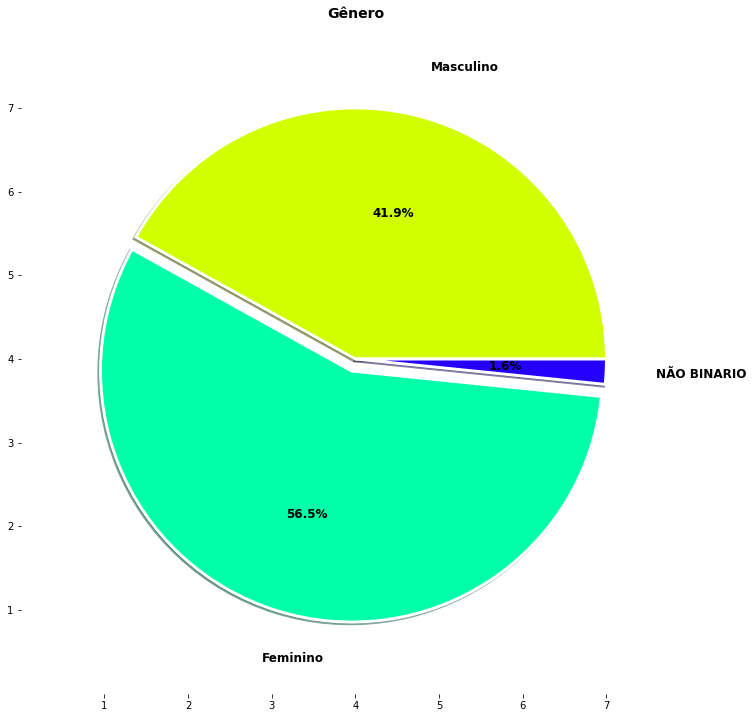

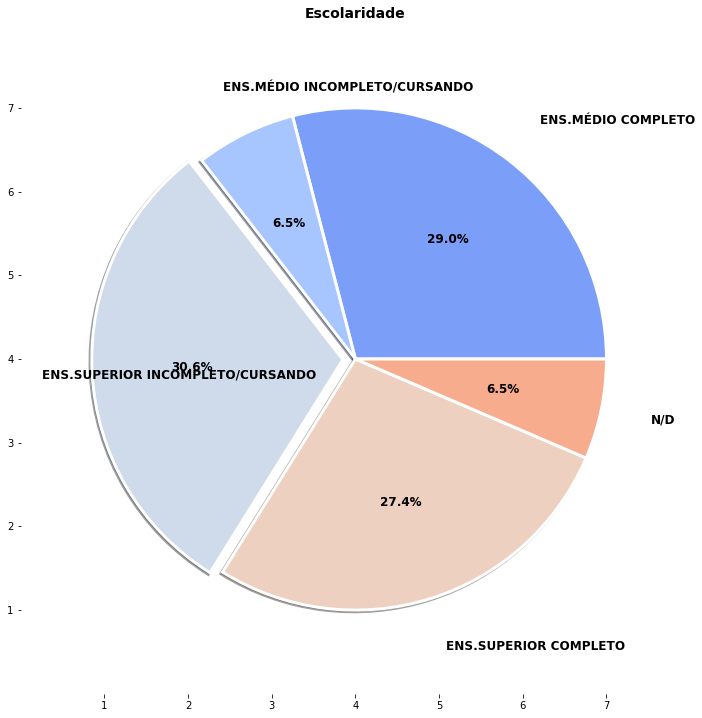

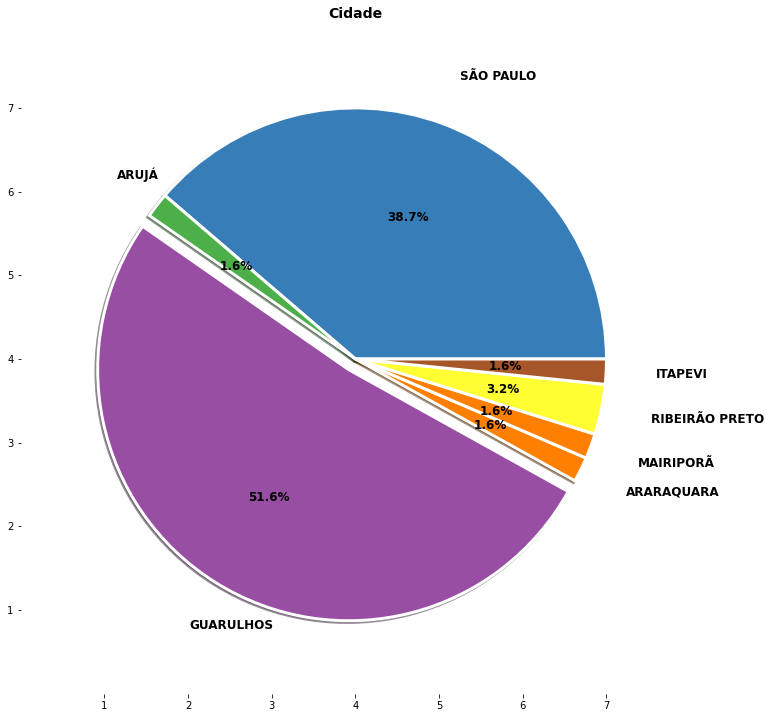

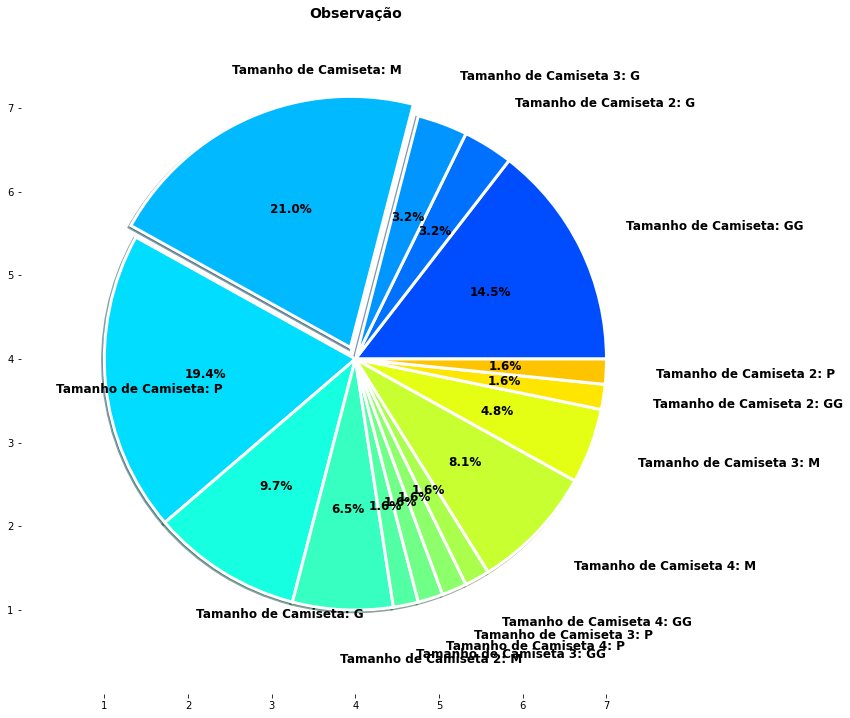

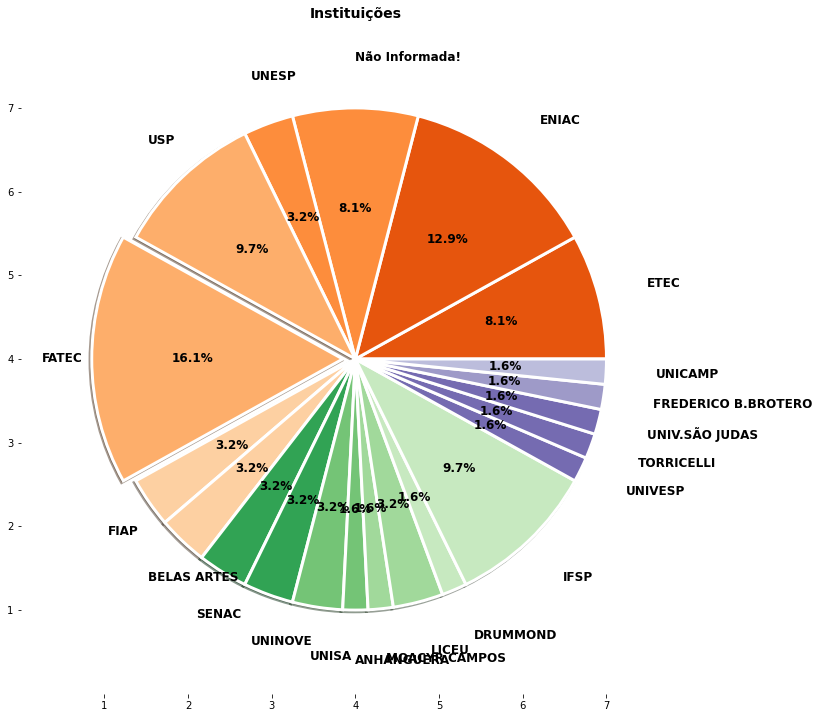

In [13]:
#
pieGraph(dataPieGraph(ins['genero'])
        ,titulo='Gênero'
        ,nomeArquivo='./Imagens2/Genero.jpg'
        ,colorMap='hsv'
        )

pieGraph(dataPieGraph(ins['escolaridade2'])
        ,titulo='Escolaridade'
        ,nomeArquivo='./Imagens2/Escolaridade.jpg'
        ,colorMap='coolwarm'
        )

pieGraph(dataPieGraph(ins['cidade'])
        ,titulo='Cidade'
        ,nomeArquivo='./Imagens2/Cidade.jpg'
        ,colorMap='Set1'
        )

pieGraph(dataPieGraph(ins['camiseta'])
        ,titulo='Observação'
        ,nomeArquivo='./Imagens2/Observacao.jpg'
        ,colorMap='jet'
        )

pieGraph(dataPieGraph(ins['instituicaoAjustada'])
        ,titulo='Instituições'
        ,nomeArquivo='./Imagens2/Instituicao.jpg'
        ,colorMap='tab20c'
        )

### Gráfico de pizza com agrupamento de dado e seleção.

In [14]:
insInst=pd.DataFrame(ins.groupby('instituicaoAjustada')['nome'].count())
insInst.reset_index(inplace=True)
insInst=insInst[(insInst['nome']>=3)]
insInst

,instituicaoAjustada,nome
3,ENIAC,8
4,ETEC,5
5,FATEC,10
8,IFSP,6
11,Não Informada!,5
20,USP,6


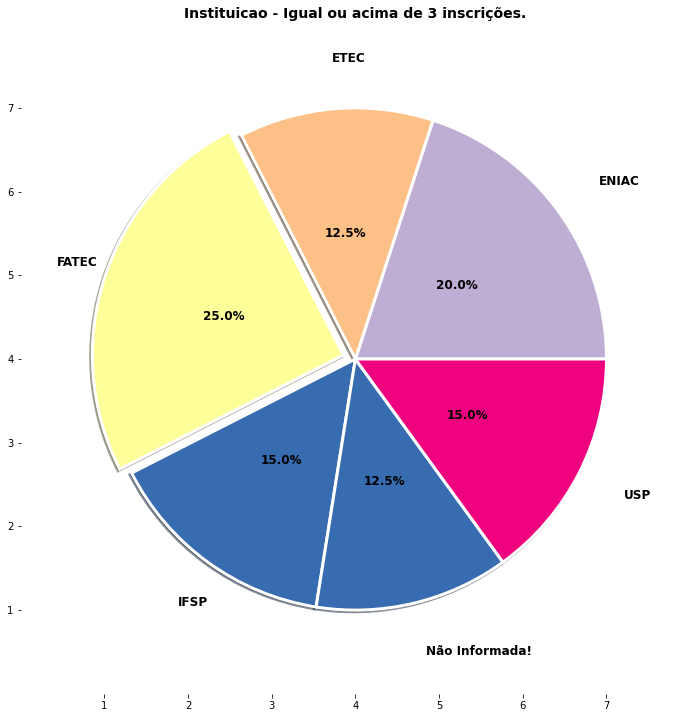

In [15]:
def pieGraphCompute(data, etiquetas, **kargs):
    
    colormap='viridis'
    nomeArquivo='./Imagens2/'+'Instituicao_AcimaDe'+'.jpg'
    
    for chave in kargs:
        if (chave=='titulo'):
            titulo=kargs[chave]
        if (chave=='colormap'):
            colormap=kargs[chave]
        if (chave=='arquivo'):
            nomeArquivo='./imagens2/'+kargs['arquivo']
            
    colors = plt.get_cmap(colormap)(np.linspace(0.2, 0.7, len(etiquetas)))
    
    fig, ax = plt.subplots(figsize=(12,16))
    plt.title(titulo, fontdict={'size':14, 'weight':'bold'})

    explode=explodePie(data)

    ax.pie(x=data
            ,labels=etiquetas
            ,colors=colors
            ,autopct='%1.1f%%'
            ,pctdistance=.5
            ,labeldistance=1.2
            ,radius=3
            ,wedgeprops={"linewidth": 3, "edgecolor": "white"}
            ,textprops={'size':12, 'weight':'bold'}
            ,center=(4,4)
            ,frame=False
            ,explode=explode
            ,shadow=True
           )
    ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
           ylim=(0, 8), yticks=np.arange(1, 8))
    plt.savefig(nomeArquivo, dpi=300) #, orietation='landscape')
    plt.show()

pieGraphCompute(data=insInst['nome'], 
                etiquetas=insInst['instituicaoAjustada'],
                titulo='Instituicao - Igual ou acima de 3 inscrições.', 
                colormap='Accent',
                arquivo='Instituicao_AcimaDe.jpg'
               )

### Gráfico de pizza calculando faixa de valores.

Faixa de dados:
 [['De 15 à 19.', 'De 20 à 29.', 'De 30 à 39.', 'De 40 à 49.', '50+'], [24, 31, 6, 0, 1]]: 


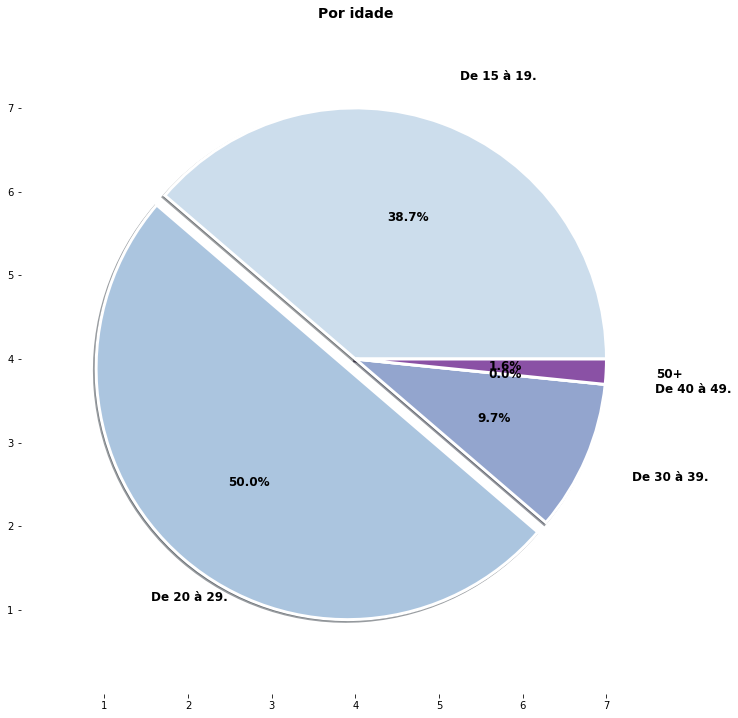

In [16]:
dataPie=dataComputeByRange([ #{'abaixo':0},{'min':1,'max':14},
                           {'min':15,'max':19},{'min':20,'max':29},{'min':30,'max':39},
                           {'min':40,'max':49},{'acima':50}],
                        ins['idade'] 
                   )
print('Faixa de dados:\n {dataPie}: '.format(dataPie=dataPie))

pieGraph(dataPie
        ,titulo='Por idade'
        ,nomeArquivo='./Imagens2/PorIdade.jpg'
        ,colorMap='BuPu')

### Scatter Plot .

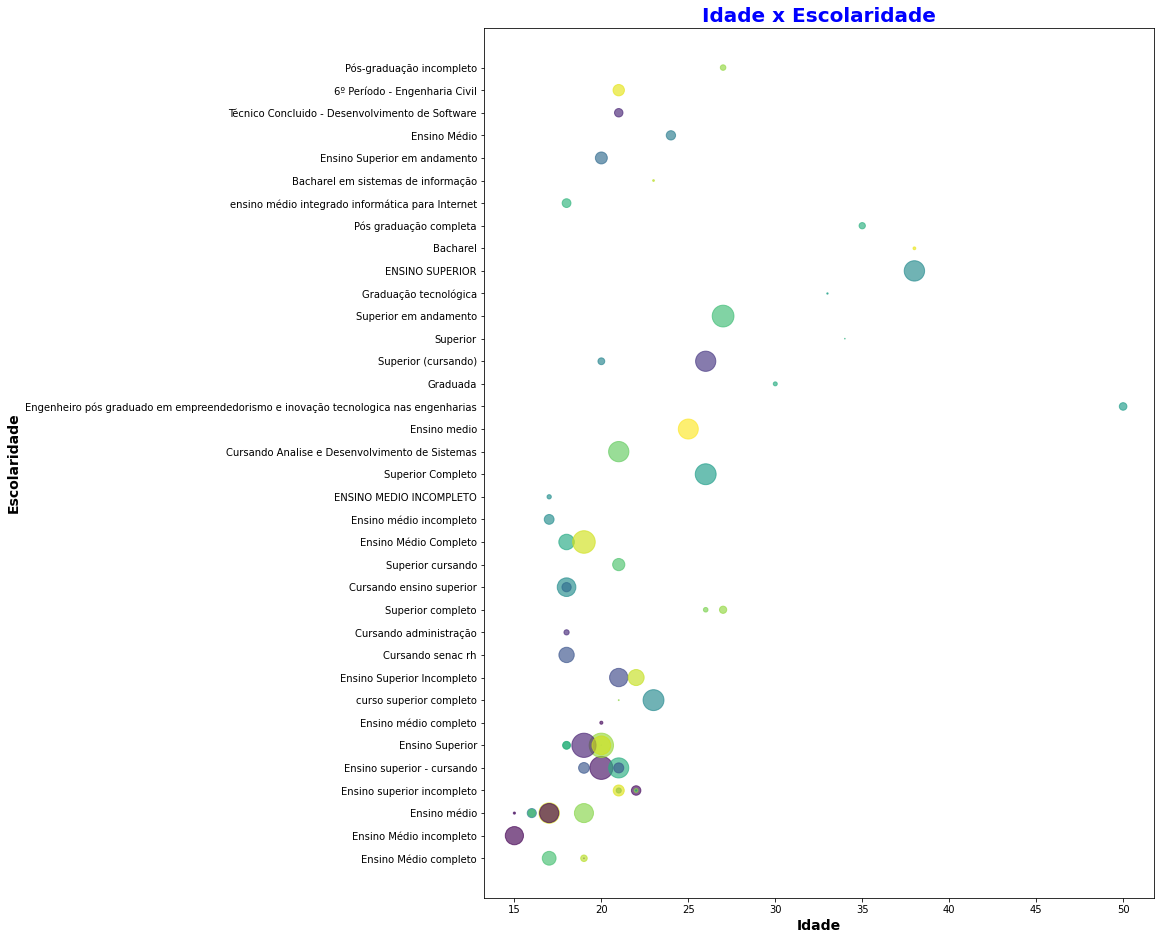

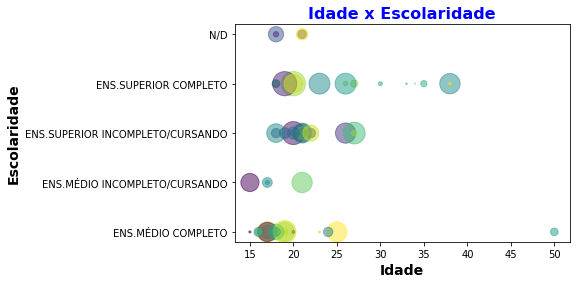

In [17]:
def scatterPlot():
    idade=ins['idade']
    escolar1=ins['escolaridade']
    escolar2=ins['escolaridade2']

    N=len(idade)
    colors = np.random.rand(N)
    area = (25 * np.random.rand(N))**2
    
    plt.figure(figsize=(12,16))
    plt.title('Idade x Escolaridade', c='blue', fontsize=20, fontweight='bold')
    plt.scatter(idade, escolar1, s=area, c=colors, alpha=.65)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens2/Scatter01.jpg', dpi=300, orientation='landscape')
    plt.show()

    plt.title('Idade x Escolaridade', c='blue', fontsize=16, fontweight='bold')
    plt.scatter(idade, escolar2, s=area, c=colors, alpha=.5)
    plt.xlabel('Idade', {'fontsize':14, 'fontweight':'bold'})
    plt.ylabel('Escolaridade', {'fontsize':14, 'fontweight':'bold'})
    plt.savefig('./imagens2/Scatter02.jpg', dpi=300, orientation='landscape')
    plt.show()

scatterPlot()

### Gráfico de linha (plot).

In [18]:
def graficoGenerico(dataFrame, **kargs):
    #np.random.seed(8192)
    ## Kargs
    titulo= "Título" if (kargs.get('titulo') is None) else kargs.get('titulo')
    xlabel= "Eixo X" if (kargs.get('xlabel') is None) else kargs.get('xlabel')
    ylabel= "Eixo Y" if (kargs.get('ylabel') is None) else kargs.get('ylabel')
    rotacao= 0 if (kargs.get('rotacao') is None) else kargs.get('rotacao')
    arquivo= './imagens2/Grafico'+str(np.random.randint(1,100)).zfill(3)+'.jpg' if (kargs.get('arquivo') is None) else kargs.get('arquivo')
    
    plt.figure(figsize=(12,16))
    plt.title(titulo, {'fontsize':20,'fontweight':'bold', 'color':'Blue'})
    
    plt.xlabel(xlabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.ylabel(ylabel, {'fontsize':18,'fontweight':'bold', 'color':'Black'})
    plt.xticks(rotation=rotacao)
    
    plt.plot(dataFrame, linewidth=2.5, color='Green', marker='s', 
                 mec='blue', markersize=12 )
    plt.savefig(arquivo, dpi=300, orientation='landscape')
    plt.show()

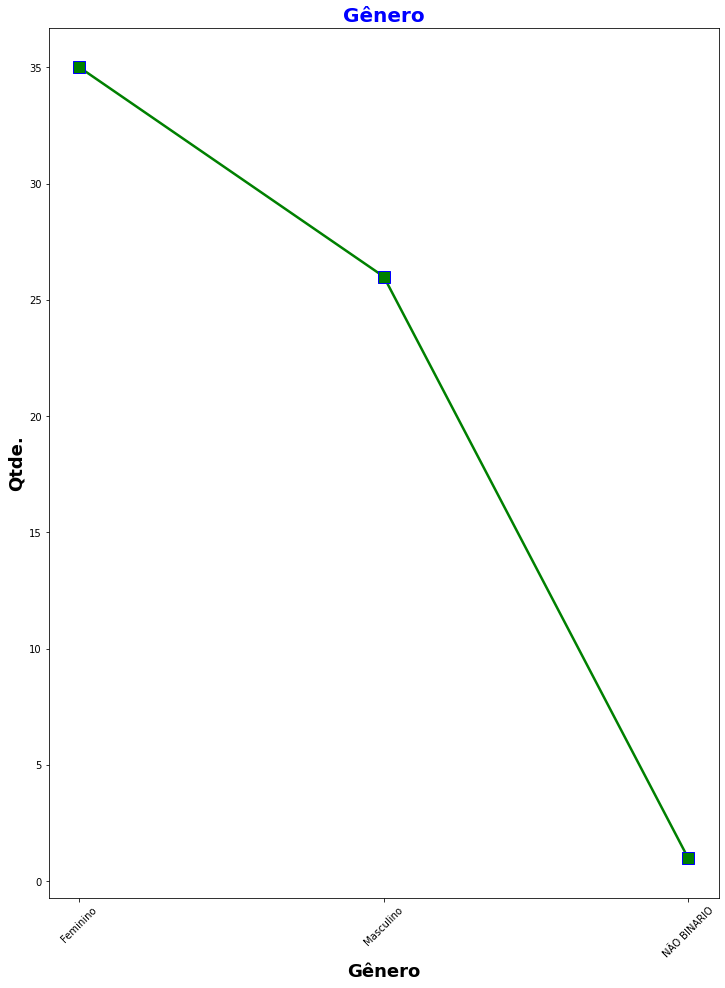

In [19]:
ins1=ins.groupby('genero')['genero'].count()
    
graficoGenerico(ins1, titulo='Gênero', xlabel='Gênero', ylabel='Qtde.', 
                rotacao=45, arquivo='./imagens2/Grafico_001.jpg')

### Gerar um atquivo html com os principais dados.

In [20]:
# https://stackoverflow.com/questions/50807744/apply-css-class-to-pandas-dataframe-using-to-html
def geraHTML(dataFrame, arquivoHTML = 'index_grupos.html', 
             cssStyle = 'style.css', titulo = 'Html'):
    html_string = '''
        <!DOCTYPE html>
        <html lang='pt-br'>
          <head>
              <title>{titulo}</title>
          </head>
          <link rel="stylesheet" type="text/css" href="{css}"/>
          <body>
                {tabela}
          </body>
        </html>
    '''
    with open(arquivoHTML, 'w') as arquivo:
        arquivo.write(html_string.format(titulo=titulo,
                               tabela=dataFrame.to_html(
                                       index=False,
                                       justify='center',
                                       classes='mystyle'),
                               css=cssStyle
                              ))
    
insHtml=ins[['nome','dataNascimento','dataNascAjustada','idade','genero','generoId',
             'escolaridade','escolaridade2','instituicao','instituicaoAjustada',
             'cidade','grupo','camiseta',]]       
insHtml.columns=[['Nome','Data Nascimento','Data Nasc.','Idade','Gênero','Id.Gênero',
                  'Escolaridade','Escolar.Ajustado','Instituição','Inst.Ajustada',
                  'Cidade','Grupo','Camiseta']]  
        
geraHTML(insHtml, 
         './html/Hackathon 2024 - Grupos.html','../css/df_style.css',
         'Hackathon 2024 - Inscrições')

#### Nested Pie (Gráfico de Pizza interna).
#### https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [21]:
insGrafico=ins[['nome','idade','genero','instituicaoAjustada','grupo','camiseta']]
insGrafico.head()

,nome,idade,genero,instituicaoAjustada,grupo,camiseta
0,Andrey Oliveira Pinto,19,Masculino,ETEC,GRUPO 01,Tamanho de Camiseta: GG
1,Giovanna Carvalho de Moraes,17,Feminino,ETEC,GRUPO 01,Tamanho de Camiseta 2: G
2,Sthefany dos Santo Soares,19,Feminino,ETEC,GRUPO 01,Tamanho de Camiseta 3: G
3,Laura Carvalho de Moraes,15,Feminino,ETEC,GRUPO 01,Tamanho de Camiseta 3: G
5,Nicoli Mian Ventura de Paula,17,Feminino,ENIAC,GRUPO 11,Tamanho de Camiseta: M


In [22]:
## Fase 1 - Filtrar os dados.
colecao=insGrafico[(insGrafico['grupo']!='N')][['grupo','idade']]
# Teste
#colecao=colecao[(colecao['grupo']=='GRUPO 01')|(colecao['grupo']=='GRUPO 02')|(colecao['grupo']=='GRUPO 03')]
colecao

,grupo,idade
0,GRUPO 01,19
1,GRUPO 01,17
2,GRUPO 01,19
3,GRUPO 01,15
5,GRUPO 11,17
6,GRUPO 11,19
7,GRUPO 11,17
8,GRUPO 11,16
10,GRUPO 12,21
11,GRUPO 12,22


In [23]:
## Fase 2 - Quantificar o número de components por grupo e pela idade, obtendo a quantidade máxima.
## Para composição do Array do Gráfico de Pizza intermo.
maxComp=colecao.groupby('grupo').count()
maxComp=maxComp['idade'].max()
print('Máximo de componentes por grupo e idade: {max}'.format(max=maxComp))

Máximo de componentes por grupo e idade: 4


In [24]:
## Fase 3 - Montagem dos arrays de dados e das etiquetas.

# Monta as etiquetas de grupo!
grupo=[]
for grp in colecao['grupo'].values:
    adiciona=True
    for grpUnico in grupo:
        if (grpUnico==grp):
            adiciona=False
            break
    if (adiciona):
        grupo.append(grp)

# Monta o array com os dados.
# Lembrando que cada array interno deverá ter a mesma quantidade de elementos:
# [ [n1, n2, n3], [n1, n2, n3], [n1, n2, n3], ... ] 
dadosGrupo=[]; etiquetaInterna=[]
for grp in grupo:
    subArrayGrupo=[]
    dadoGrp=colecao[(colecao['grupo']==grp)][['grupo','idade']]
    for i in dadoGrp.values:
        subArrayGrupo.append(float(i[1]))

        # Adiciona as etiquetas do array interno.
        etiquetaInterna.append(str(i[1]))

    if (len(subArrayGrupo)<maxComp):
        completar=(maxComp-len(subArrayGrupo))
        for i in range(0,completar):
            subArrayGrupo.append(float(0))

            ## Adiciona estiquetas vazias para a coerencia com os dados do array interno
            etiquetaInterna.append('')

    dadosGrupo.append(subArrayGrupo)

def saida():
    print('Etiqueta dos grupos (array:grupo):\n', grupo)
    print('Quantidade de grupos:', len(grupo), '\n')
    print('Etiqueta dos dados internos (array:labelInnerPie):\n', etiquetaInterna)
    print('Quantidade de etiquetas internas:', len(etiquetaInterna), '\n')
    print('Dados do grupo (array:dataGrupo):\n', dadosGrupo)
    print('Quantidade por grupo:', len(dadosGrupo)*maxComp)

saida()

Etiqueta dos grupos (array:grupo):
 ['GRUPO 01', 'GRUPO 11', 'GRUPO 12', 'GRUPO 15', 'GRUPO 25', 'GRUPO 18', 'GRUPO 19', 'GRUPO 20', 'GRUPO 17', 'GRUPO 02', 'GRUPO 03', 'GRUPO 04', 'GRUPO 09']
Quantidade de grupos: 13 

Etiqueta dos dados internos (array:labelInnerPie):
 ['19', '17', '19', '15', '17', '19', '17', '16', '21', '22', '21', '22', '20', '19', '21', '21', '18', '18', '20', '19', '20', '23', '21', '21', '16', '15', '15', '', '18', '18', '', '', '18', '18', '', '', '17', '17', '', '', '21', '25', '', '', '26', '20', '22', '34', '20', '24', '', '']
Quantidade de etiquetas internas: 52 

Dados do grupo (array:dataGrupo):
 [[19.0, 17.0, 19.0, 15.0], [17.0, 19.0, 17.0, 16.0], [21.0, 22.0, 21.0, 22.0], [20.0, 19.0, 21.0, 21.0], [18.0, 18.0, 20.0, 19.0], [20.0, 23.0, 21.0, 21.0], [16.0, 15.0, 15.0, 0.0], [18.0, 18.0, 0.0, 0.0], [18.0, 18.0, 0.0, 0.0], [17.0, 17.0, 0.0, 0.0], [21.0, 25.0, 0.0, 0.0], [26.0, 20.0, 22.0, 34.0], [20.0, 24.0, 0.0, 0.0]]
Quantidade por grupo: 52


### Monta o Nested Pie.

In [25]:
def innerPie(dados, labelOuterPie, labelInnerPie, **kargs):

    titulo='Título'; arquivoImagem='InnerPie_'+str(np.random.randint(1,999)).zfill(3)
    for kgs in kargs:
        if (kgs=='titulo'):
            titulo=kargs[kgs]
        if (kgs=='arquivoimagem'):
            arquivoImagem=kargs[kgs]
  
    fig, ax = plt.subplots(figsize=(12,16))
    
    size = 0.3
    #vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

    # Dados, valores...
    vals = np.array(dados)
    
    cmap = plt.colormaps["Set2"]
    outer_colors = cmap(np.arange(4)*2)
    inner_colors = cmap([1, 2, 5, 6, 9, 10])
    
    ax.pie(vals.sum(axis=1), 
           labels=labelOuterPie,
           radius=1, 
           colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=True,
           labeldistance=1.08
           )
    
    ax.pie(vals.flatten(), 
           labels=labelInnerPie,
           radius=1-size, 
           colors=inner_colors, 
           wedgeprops=dict(width=size, edgecolor='w'),
           frame=False,
           labeldistance=.75
           )
    
    ax.set(aspect="equal", title=titulo)
    plt.savefig('./Imagens2/'+arquivoImagem, dpi=300, orientation='landscape')
    plt.show()

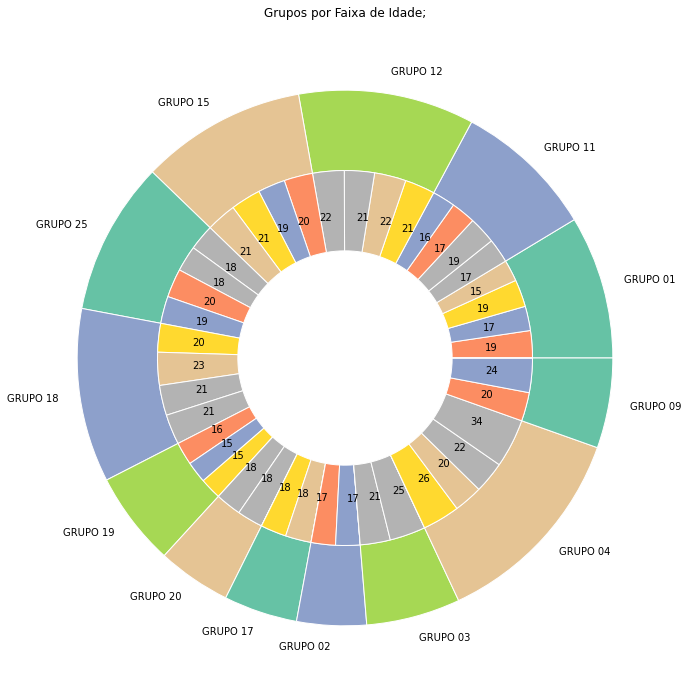

In [26]:
innerPie(dadosGrupo, grupo, etiquetaInterna, titulo='Grupos por Faixa de Idade;', arquivoimagem='InnerPie_001.jpg')

In [27]:
insGrp=ins[(ins['grupo']!='N')][['nome','idade','grupo']]
insGrp.groupby(['grupo','idade'])[['grupo','idade']].count()
insGrp.reset_index()
insGrp

,nome,idade,grupo
0,Andrey Oliveira Pinto,19,GRUPO 01
1,Giovanna Carvalho de Moraes,17,GRUPO 01
2,Sthefany dos Santo Soares,19,GRUPO 01
3,Laura Carvalho de Moraes,15,GRUPO 01
5,Nicoli Mian Ventura de Paula,17,GRUPO 11
6,Marcus Vinicius Gomes Pereira,19,GRUPO 11
7,Laís Souza,17,GRUPO 11
8,Maria Clara Pereira Elídio,16,GRUPO 11
10,Giulia Evelin Oliveira Castro,21,GRUPO 12
11,Guilherme Augusto de Souza Pereira,22,GRUPO 12


In [28]:
### Valor máxino por grupo:
valorMax=insGrp.groupby(['grupo'])['idade'].count().max()

### Total de grupos:
grupoIdade=[]
for grp in insGrp['grupo']:
    adiciona=True
    for i in grupoIdade:
        if (grp==i):
            adiciona=False
            break
    if (adiciona):
        grupoIdade.append(grp)


data=[]; etiquetaInterna=[]
for grp in grupoIdade:
    dataGrp=[]
    
    agruparIdade=insGrp[(insGrp['grupo']==grp)].groupby(['idade'])[['idade']].count()
    agruparIdade.columns=['idade1']
    agruparIdade.reset_index(inplace=True)
    agruparIdade.columns=['idade','total']

    soma=agruparIdade['total'].sum()
    
    cont=0
    for i in agruparIdade.values:
        cont+=1

        ## Percentual
        dataGrp.append(i[1]/soma)

        ## Etiqueta...
        etiquetaInterna.append(str(i[0]))

    if (cont<valorMax):
        for ind in range(0,(valorMax-cont)):
            dataGrp.append(0);
            etiquetaInterna.append('')

    data.append(dataGrp)

### Outputs...
def saida1():
    print('Valor máximo de componentes por grupo: {max}\n'.format(max=valorMax))
    print('Grupos:\n', grupoIdade, '\n')
    print('Etiquetas:\n', etiquetaInterna, '\n')
    print('Quantidade de etiquetas: {qtde}.\n'.format(qtde=len(etiquetaInterna)))
    print('Dados:\n', data, '\n')
    print('Quantidade de "arrays" de dados: {qtde}.'.format(qtde=len(data)))
    print('Quantidade de dados por valor máximo de {max}: {qtde}.'.format(qtde=len(data)*valorMax, max=valorMax))

saida1()

Valor máximo de componentes por grupo: 4

Grupos:
 ['GRUPO 01', 'GRUPO 11', 'GRUPO 12', 'GRUPO 15', 'GRUPO 25', 'GRUPO 18', 'GRUPO 19', 'GRUPO 20', 'GRUPO 17', 'GRUPO 02', 'GRUPO 03', 'GRUPO 04', 'GRUPO 09'] 

Etiquetas:
 ['15', '17', '19', '', '16', '17', '19', '', '21', '22', '', '', '19', '20', '21', '', '18', '19', '20', '', '20', '21', '23', '', '15', '16', '', '', '18', '', '', '', '18', '', '', '', '17', '', '', '', '21', '25', '', '', '20', '22', '26', '34', '20', '24', '', ''] 

Quantidade de etiquetas: 52.

Dados:
 [[0.25, 0.25, 0.5, 0], [0.25, 0.5, 0.25, 0], [0.5, 0.5, 0, 0], [0.25, 0.25, 0.5, 0], [0.5, 0.25, 0.25, 0], [0.25, 0.5, 0.25, 0], [0.6666666666666666, 0.3333333333333333, 0, 0], [1.0, 0, 0, 0], [1.0, 0, 0, 0], [1.0, 0, 0, 0], [0.5, 0.5, 0, 0], [0.25, 0.25, 0.25, 0.25], [0.5, 0.5, 0, 0]] 

Quantidade de "arrays" de dados: 13.
Quantidade de dados por valor máximo de 4: 52.


### Inner Pie - Agrupado por Idade.

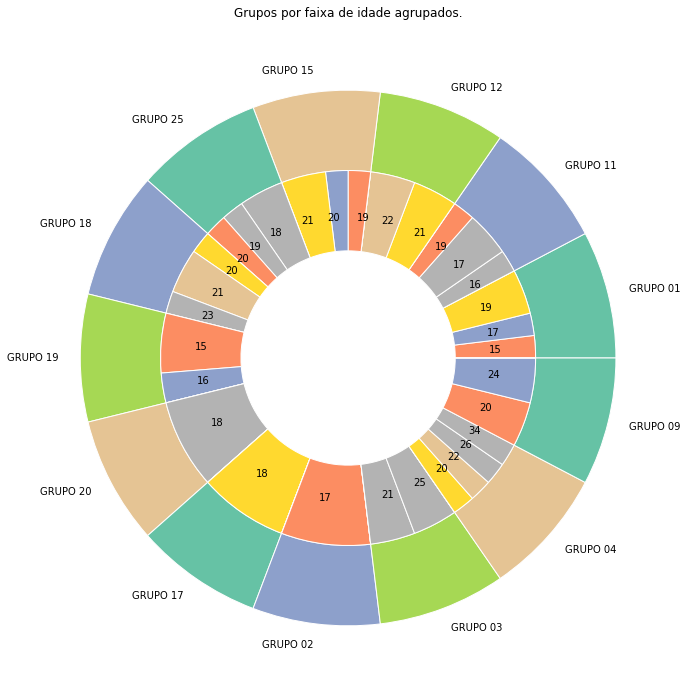

In [29]:
innerPie(data, grupoIdade, etiquetaInterna, titulo='Grupos por faixa de idade agrupados.', arquivoimagem='InnerPie_002.jpg')

### End